In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 316us/step - loss: 0.1056 - acc: 0.9577 - val_loss: 1.1076 - val_acc: 0.7980
Epoch 2/9
7982/7982 [==============================] - 2s 270us/step - loss: 0.1022 - acc: 0.9580 - val_loss: 1.1135 - val_acc: 0.8070
Epoch 3/9
7982/7982 [==============================] - 2s 257us/step - loss: 0.1025 - acc: 0.9588 - val_loss: 1.0979 - val_acc: 0.7960
Epoch 4/9
7982/7982 [==============================] - 2s 263us/step - loss: 0.1031 - acc: 0.9575 - val_loss: 1.1262 - val_acc: 0.7950
Epoch 5/9
7982/7982 [==============================] - 2s 259us/step - loss: 0.0972 - acc: 0.9594 - val_loss: 1.1513 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 2s 254us/step - loss: 0.0991 - acc: 0.9562 - val_loss: 1.2340 - val_acc: 0.7900
Epoch 7/9
7982/7982 [==============================] - 2s 257us/step - loss: 0.0959 - acc: 0.9577 - val_loss: 1.1830 - val_acc: 0.7970
Epoch 8

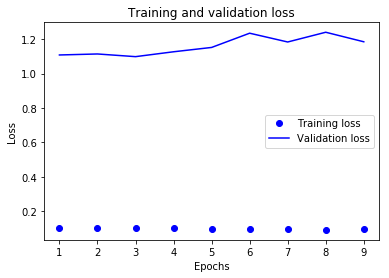

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

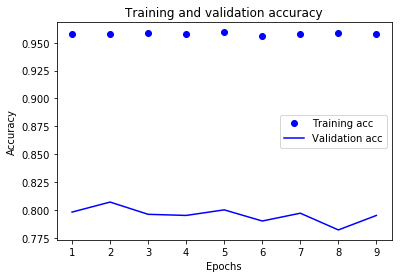

In [21]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 317us/step


In [23]:
results

[1.3532321342695852, 0.7822796082454182]